In [22]:
__doc__ = """Hinge joint example, for detailed explanation refer to Zhang et. al. Nature Comm.  methods section."""

import numpy as np
import sys

# FIXME without appending sys.path make it more generic
sys.path.append("../../")
from elastica import *
from external_force_class_for_joint_test import EndpointForcesSinusoidal
from joint_cases_postprocessing import plot_position, plot_video, plot_video_xy, plot_video_xz


class LegSimulator(
    BaseSystemCollection, Constraints, Connections, Forcing, CallBacks
):
    pass


leg_sim = LegSimulator()

# setting up test params
n_elem = 10
direction = np.array([1.0, 0.0, 0])
normal = np.array([0.0, 1.0, 0.0])
roll_direction = np.cross(direction, normal)
base_length = 0.2
base_radius = 0.007
base_area = np.pi * base_radius ** 2
density = 1750
nu = 0.001
E = 3e7
poisson_ratio = 0.5
shear_modulus = E / (poisson_ratio + 1.0)

start_rod_1 = np.zeros((3,))
start_rod_2 = start_rod_1 + direction * base_length

# Create rod 1
rod1 = CosseratRod.straight_rod(
    n_elem,
    start_rod_1,
    direction,
    normal,
    base_length,
    base_radius,
    density,
    nu,
    E,
    shear_modulus=shear_modulus,
    poisson_ratio=poisson_ratio
)

leg_sim.append(rod1)
# Create rod 2
# rod2 = CosseratRod.straight_rod(
#     n_elem,
#     start_rod_2,
#     direction,
#     normal,
#     base_length,
#     base_radius,
#     density,
#     nu,
#     E,
#     shear_modulus=shear_modulus,
#     poisson_ratio=poisson_ratio
# )
# hinge_joint_sim.append(rod2)

# Apply boundary conditions to rod1.
leg_sim.constrain(rod1).using(
    OneEndFixedRod, constrained_position_idx=(0,), constrained_director_idx=(0,)
)

# # Connect rod 1 and rod 2
# hinge_joint_sim.connect(
#     first_rod=rod1, second_rod=rod2, first_connect_idx=-1, second_connect_idx=0
# ).using(
#     HingeJoint, k=1e5, nu=0, kt=5e3, normal_direction=roll_direction
# )  # 1e-2

# Add forces to rod2
# hinge_joint_sim.add_forcing_to(rod2).using(
#     EndpointForcesSinusoidal,
#     start_force_mag=0,
#     end_force_mag=5e-3,
#     ramp_up_time=0.2,
#     tangent_direction=direction,
#     normal_direction=normal,
# )

origin_force = np.array([0.0, 0.0, 0.0])
end_force = np.array([-15.0, 0.0, 0.0]) 
leg_sim.add_forcing_to(rod1).using(
    EndpointForces,                 # Traction BC being applied
    origin_force,                   # Force vector applied at first node
    end_force,                      # Force vector applied at last node
    ramp_up_time=final_time / 2.0   # Ramp up time 
)
# Callback functions
# Add call backs
class TestJoints(CallBackBaseClass):
    """
    Call back function for testing joints
    """

    def __init__(self, step_skip: int, callback_params: dict):
        CallBackBaseClass.__init__(self)
        self.every = step_skip
        self.callback_params = callback_params

    def make_callback(self, system, time, current_step: int):
        if current_step % self.every == 0:
            self.callback_params["time"].append(time)
            self.callback_params["step"].append(current_step)
            self.callback_params["position"].append(system.position_collection.copy())
            self.callback_params["velocity"].append(system.velocity_collection.copy())
            return


pp_list_rod1 = defaultdict(list)
# pp_list_rod2 = defaultdict(list)


leg_sim.collect_diagnostics(rod1).using(
    TestJoints, step_skip=1000, callback_params=pp_list_rod1
)
# hinge_joint_sim.collect_diagnostics(rod2).using(
#     TestJoints, step_skip=1000, callback_params=pp_list_rod2
# )


leg_sim.finalize()
timestepper = PositionVerlet()
# timestepper = PEFRL()

final_time = 1
dl = base_length / n_elem
dt = 1e-5
total_steps = int(final_time / dt)
print("Total steps", total_steps)
integrate(timestepper, leg_sim, final_time, total_steps)

# PLOT_FIGURE = True
# SAVE_FIGURE = False
# PLOT_VIDEO = False

# # plotting results
# if PLOT_FIGURE:
#     filename = "hinge_joint_test.png"
#     plot_position(pp_list_rod1, pp_list_rod2, filename, SAVE_FIGURE)

# if PLOT_VIDEO:
#     filename = "hinge_joint_test.mp4"
#     plot_video(pp_list_rod1, pp_list_rod2, video_name=filename, margin=0.2, fps=100)
#     plot_video_xy(
#         pp_list_rod1, pp_list_rod2, video_name=filename + "_xy.mp4", margin=0.2, fps=100
#     )
#     plot_video_xz(
#         pp_list_rod1, pp_list_rod2, video_name=filename + "_xz.mp4", margin=0.2, fps=100
#     )

Total steps 99999


100%|██████████| 99999/99999 [00:05<00:00, 17548.87it/s]

Final time of simulation is :  0.9999999999973068


In [23]:
print(pp_list_rod1.keys())

dict_keys(['time', 'step', 'position', 'velocity'])


In [24]:
pp_list_rod1

defaultdict(list,
            {'time': [0.0,
              0.010000100001000111,
              0.020010200101999717,
              0.030010300102996375,
              0.040010400103999116,
              0.05000050000500171,
              0.06000060000600531,
              0.07001070010699949,
              0.08001080010798921,
              0.09001090010897893,
              0.10001100010996865,
              0.11001110011095837,
              0.12001120011194809,
              0.13001130011295173,
              0.1400114001139692,
              0.15001150011498668,
              0.16000160001600314,
              0.1700017000170206,
              0.1800018000180381,
              0.19000190001905556,
              0.20000200002007304,
              0.21000210002109052,
              0.220002200022108,
              0.23000230002312547,
              0.24000240002414294,
              0.2500025000251604,
              0.26000260002612235,
              0.2700027000270843,
             

In [25]:
pp_list_rod1['position'][-1]

array([[ 0.00000000e+00, -7.14099735e-05, -7.73638618e-03,
        -2.04822236e-02, -3.63137331e-02, -5.39298962e-02,
        -7.25546983e-02, -9.17428129e-02, -1.11240900e-01,
        -1.30901899e-01, -1.50633737e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  2.00043395e-02,  3.85078263e-02,
         5.39769999e-02,  6.62847930e-02,  7.58762301e-02,
         8.33297702e-02,  8.91878916e-02,  9.39166805e-02,
         9.79169242e-02,  1.01553074e-01]])

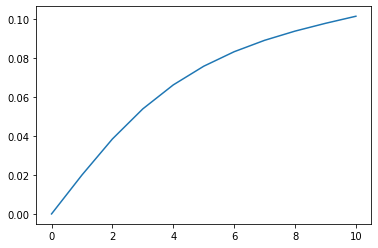

In [27]:
import matplotlib.pyplot as plt 

plt.plot(pp_list_rod1['position'][-1][-1])

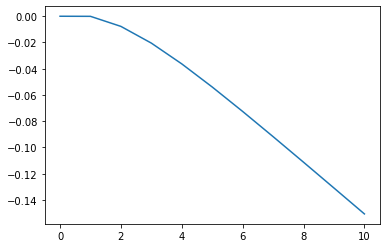

In [30]:
plt.plot(pp_list_rod1['position'][-1][0])